In [41]:
import os
import numpy as np
import pandas as pd
import patsy
import six
import tables
import xarray as xr
import matplotlib.pyplot as plt
from yatsm.config import validate_and_parse_configfile
from yatsm.io._api import get_reader, read_and_preprocess

% matplotlib nbagg

In [8]:
os.environ['ROOT'] = '/projectnb/landsat/projects/Colombia/images/'
config = validate_and_parse_configfile('/projectnb/landsat/users/parevalo/yatsm/examples/topic_xarray.yaml')

readers = dict({name: get_reader(**cfg['reader']) for name, cfg in six.iteritems(config['data']['datasets'])})

dat = read_and_preprocess(config['data']['datasets'], readers, window=((3000, 3100), (3000, 3100)))

#bands = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'ndvi']

In [ ]:
dat.dims


In [3]:
dat['red']
#dat.sel(time=('2000-01-05')) # Only valid for dimensions (e.g. x, y, time)
#dat['sensor'] == 'LC8' # Sensor is a data variable (e.g. blue, red, etc)

<xarray.DataArray 'red' (time: 258, y: 100, x: 100)>
array([[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ..., 
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[ 677.,  706.,  734., ...,  432.,  549.,  636.],
        [ 677.,  707.,  706., ...,  432.,  490.,  578.],
        [ 707.,  707.,  707., ...,  345.,  403.,  520.],
        ..., 
        [ 659.,  658.,  630., ...,  708.,  679.,  738.],
        [ 631.,  603.,  630., ...,  708.,  709.,  738.],
        [ 604.,  603.,  659., ...,  679.,  710.,  710.]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ..., 
        [  nan,   nan,   nan, ...,   nan,   na

In [29]:
dat['ndvi'] =  (dat['nir'] - dat['red']) / (dat['nir'] + dat['red'])
dat['ndvi']

<xarray.DataArray 'ndvi' (time: 258, y: 100, x: 100)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ..., 
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.53406745,  0.5       ,  0.4918657 , ...,  0.7472206 ,
          0.65286121,  0.57964309],
        [ 0.52172377,  0.5122456 ,  0.49336204, ...,  0.73267327,
          0.70544034,  0.61051213],
        [ 0.50559441,  0.51839237,  0.50576721, ...,  0.79735683,
          0.76978006,  0.66815571],
        ...,

<IPython.core.display.Javascript object>


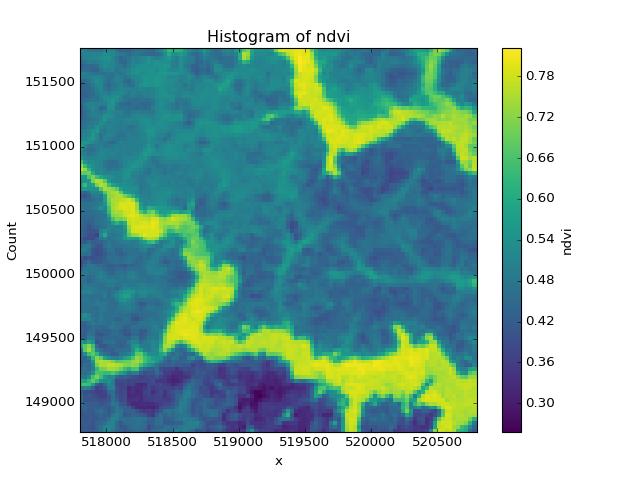

In [78]:
dat.time
year1 = dat.sel(time=slice('2000-01-01', '2001-01-01'))
year1['ndvi'].mean(dim='time').plot()


In [110]:
dat.groupby(dat['time.year']).mean(dim='time')['ndvi']

<xarray.DataArray 'ndvi' (year: 20, y: 100, x: 100)>
array([[[ 0.53406745,  0.5       ,  0.4918657 , ...,  0.7472206 ,
          0.65286121,  0.57964309],
        [ 0.52172377,  0.5122456 ,  0.49336204, ...,  0.73267327,
          0.70544034,  0.61051213],
        [ 0.50559441,  0.51839237,  0.50576721, ...,  0.79735683,
          0.76978006,  0.66815571],
        ..., 
        [ 0.55890228,  0.5483871 ,  0.56908345, ...,  0.52941176,
          0.53269098,  0.508     ],
        [ 0.5787717 ,  0.59380263,  0.57418047, ...,  0.51754685,
          0.51069703,  0.51399407],
        [ 0.58287293,  0.57264352,  0.53624208, ...,  0.54414233,
          0.51634877,  0.53366174]],

       [[ 0.43124749,  0.45816946,  0.44099409, ...,  0.7125241 ,
          0.62703185,  0.56032545],
        [ 0.41852515,  0.43071871,  0.43029772, ...,  0.75153262,
          0.70479838,  0.56981863],
        [ 0.43541514,  0.42437584,  0.41643858, ...,  0.75682703,
          0.72439051,  0.62422182],
        ..., 